# Deep Learning Tutorial with TensorFlow

# Introduction to Computer Vision with Deep Learning 

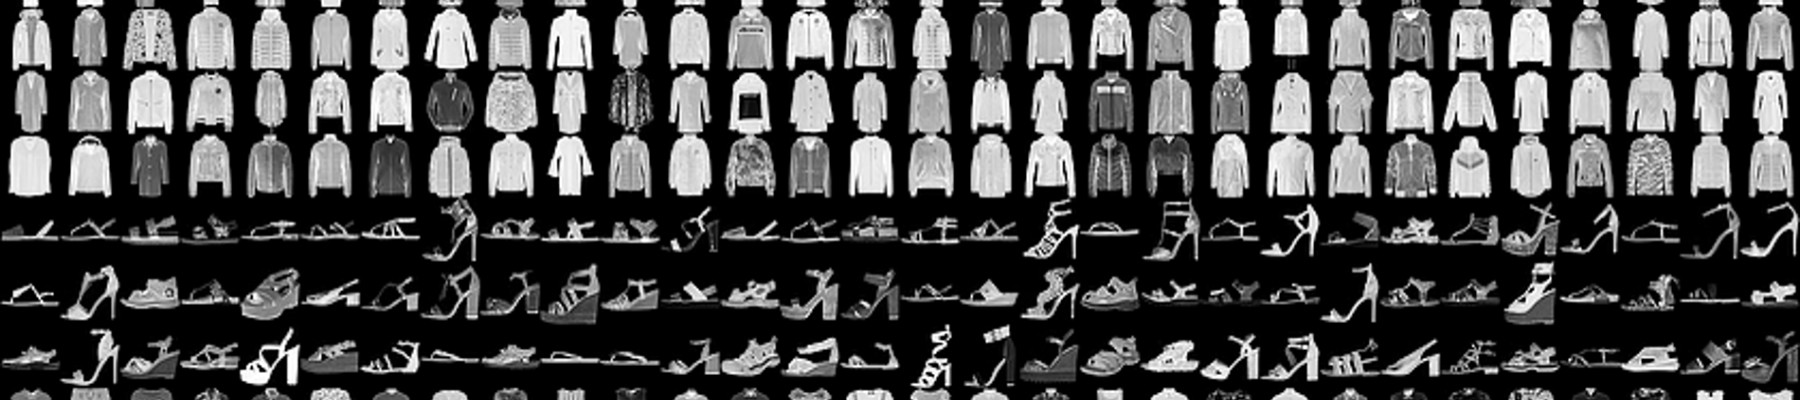

- Computer vision is the field of study that focuses on teaching computers to interpret, understand and analyze visual information from the world, just like humans do.
- It enables machines to process and analyze images and videos, making it possible for computers to understand the content and context of visual data.

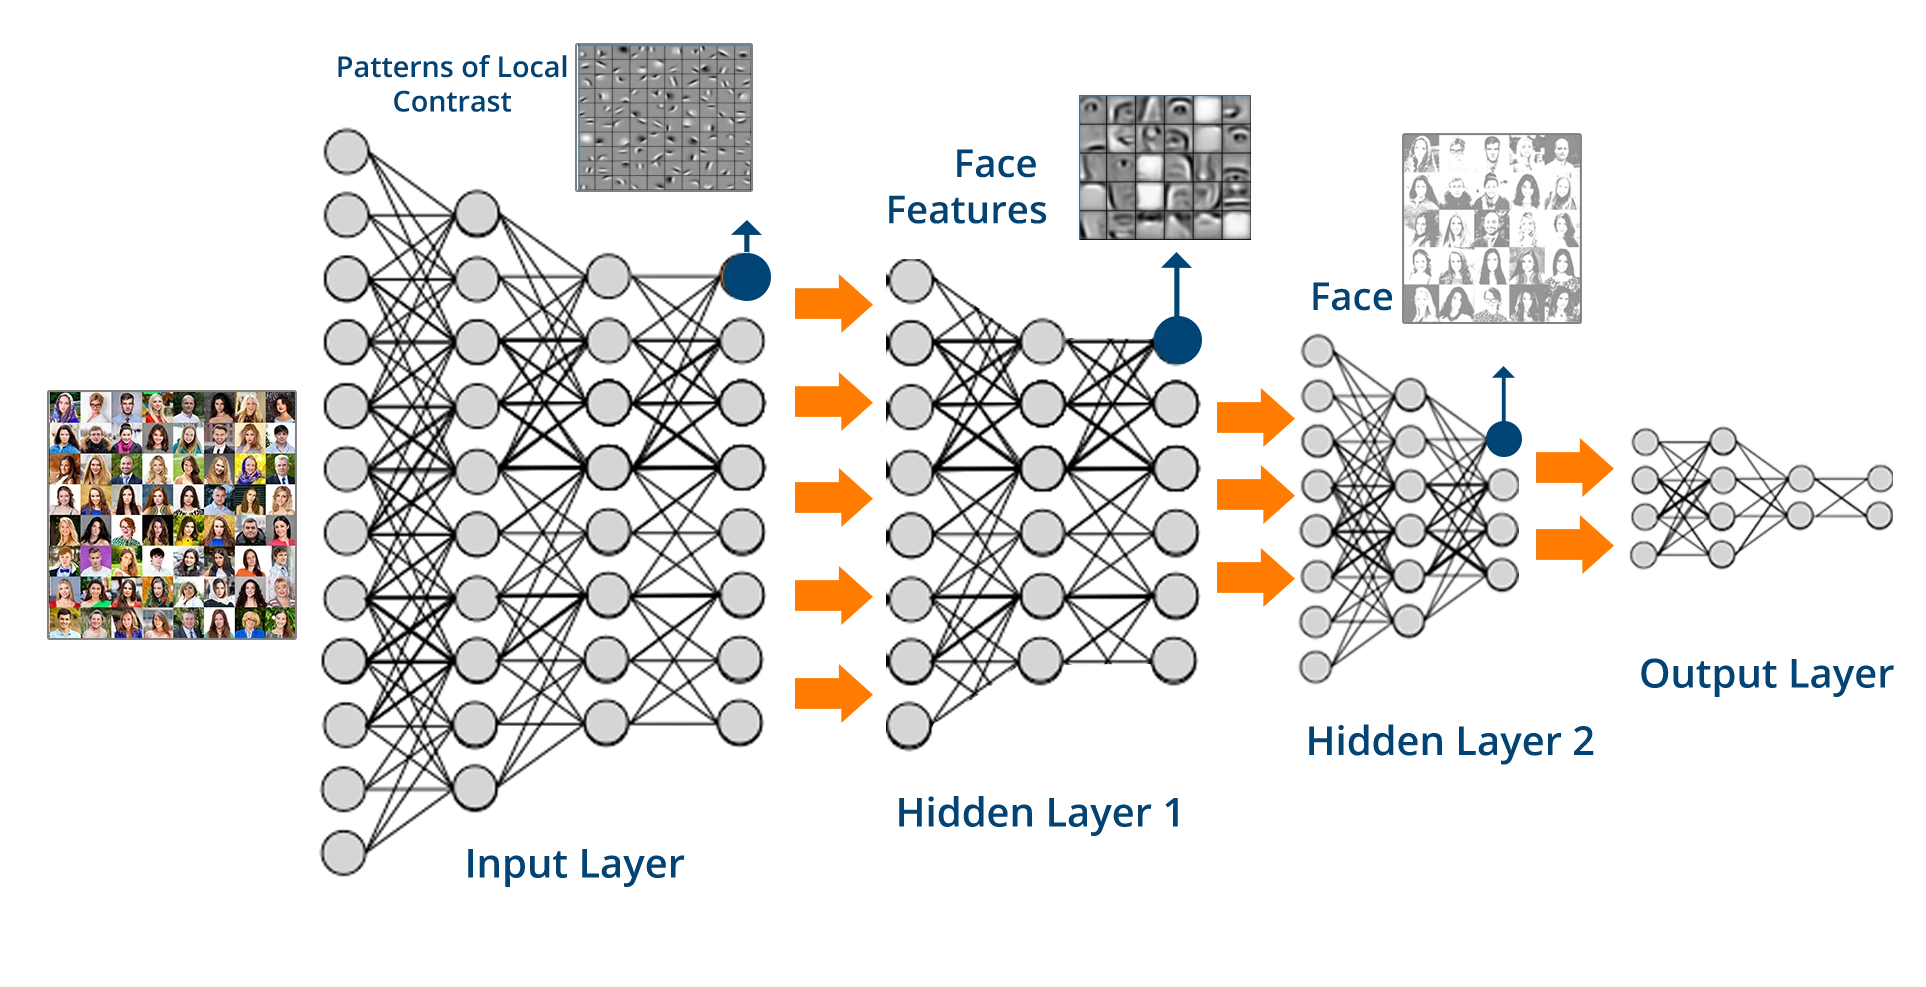

**Here's a 5-step explanation of computer vision:**
- **Image Acquisition:** This is the process of capturing visual information, such as images and videos, and converting them into a format that can be processed by computers.

- **Image Pre-processing:** This step involves cleaning and transforming raw images into a format that is suitable for analysis. This can include techniques such as cropping, resizing, normalizing and removing noise from images.

- **Feature Extraction:** In this step, computers analyze images and extract relevant features, such as lines, edges, and shapes, which are used to make predictions and classifications.

- **Machine Learning:** This step involves using algorithms, such as deep learning, to train computers to recognize patterns and make predictions based on the visual information they receive.

- **Object Recognition and Image Understanding:** The final step involves using the information extracted in the previous steps to recognize objects, classify images, and make predictions about the content and context of visual data. This allows computers to understand and analyze images and videos in the same way that humans do.

## Image Feature Extraction

A colored image is typically composed of multiple colors and almost all colors can be generated from three primary colors – red, green and blue.

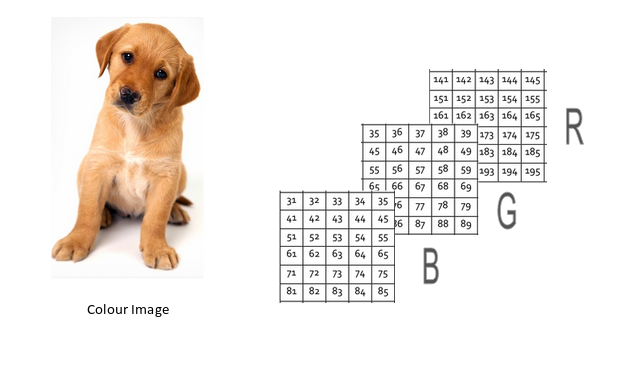

Feature Extraction
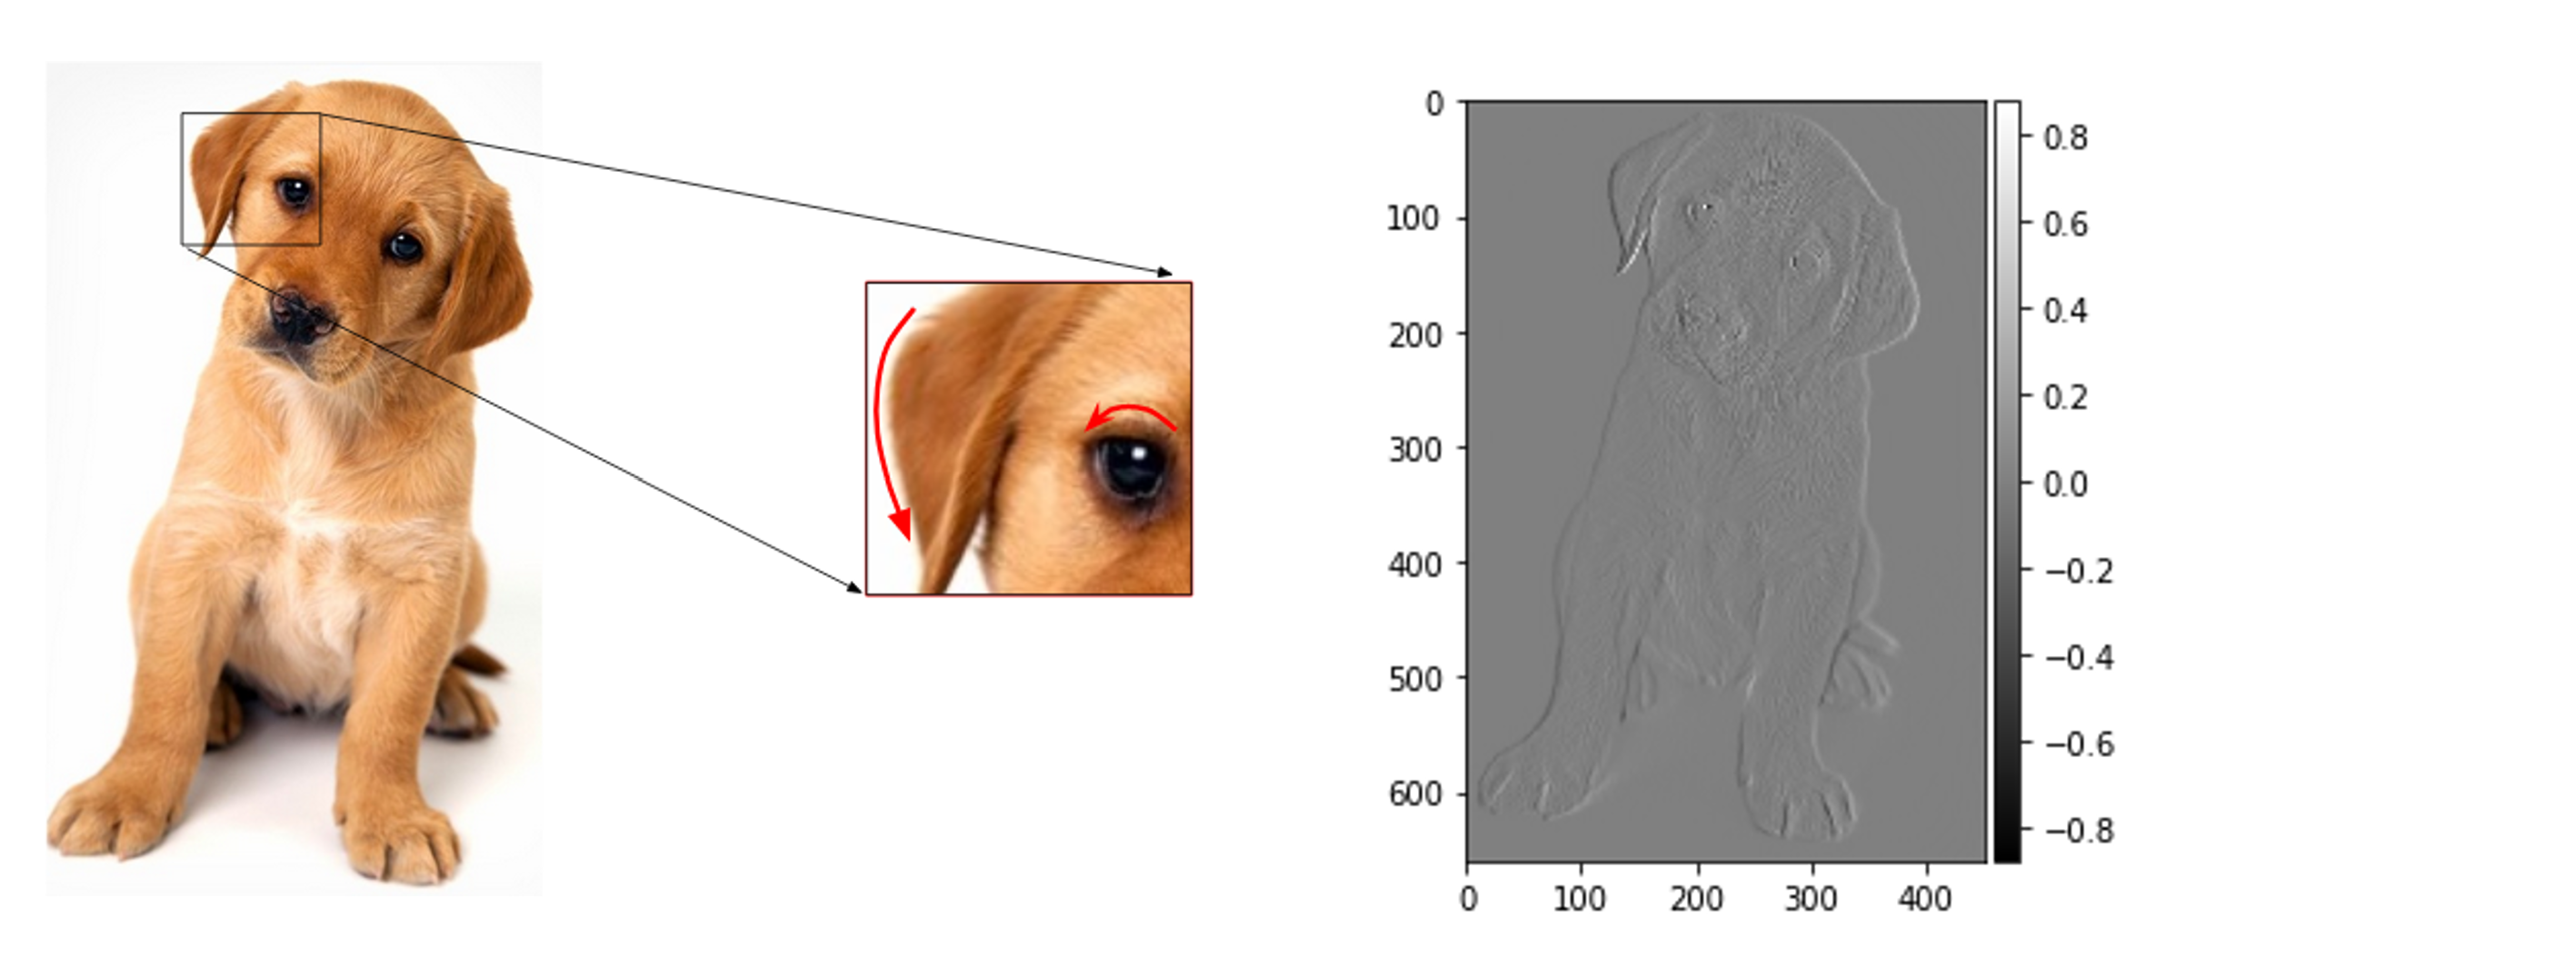

Neural Networks extract features automatically from images.

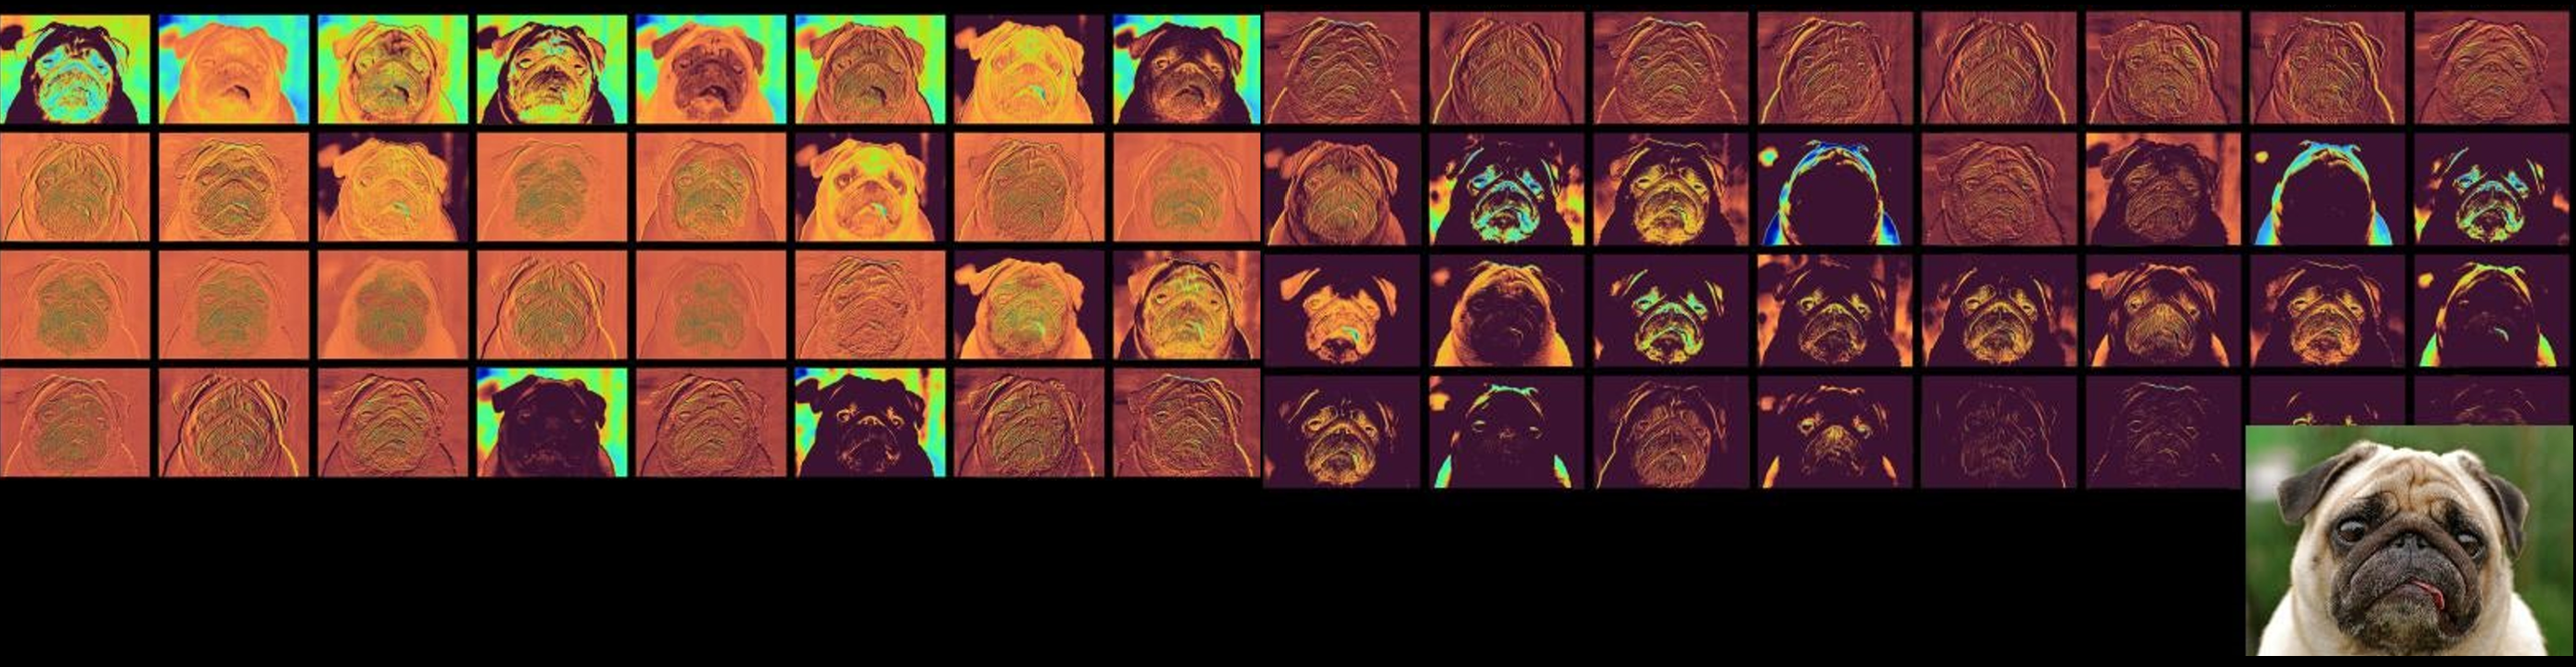

- Lines
- Edges
- Corners
- Blobs
- Circles
- Rectangles
- Triangles
- Polygons
- Textures
- Hidden Patterns

## MNIST Dataset

https://www.openml.org/search?type=data&status=active&id=40996

https://github.com/zalandoresearch/fashion-mnist

- Fashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. 
- Each example is a 28x28 grayscale image, associated with a label from 10 classes. 
- Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

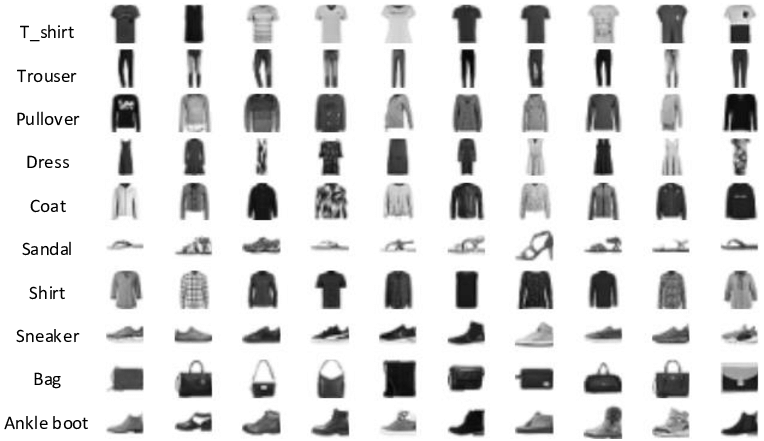

In [ ]:
# !pip install openml
# !python -m pip install --upgrade pip
# https://www.openml.org/
# https://openml.github.io/openml-python/main/examples/30_extended/datasets_tutorial.html

In [7]:
from openml.datasets import get_dataset

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
fashion_mnist = get_dataset('Fashion-MNIST')

In [10]:
fashion_mnist

OpenML Dataset
Name..........: Fashion-MNIST
Version.......: 1
Format........: ARFF
Upload Date...: 2017-12-20 13:28:27
Licence.......: Public
Download URL..: https://api.openml.org/data/v1/download/18238735/Fashion-MNIST.arff
OpenML URL....: https://www.openml.org/d/40996
# of features.: 785
# of instances: 70000

In [17]:
X, y, _, _ = fashion_mnist.get_data()


In [20]:
from sklearn.datasets import fetch_openml

In [21]:
mnist_fashion = fetch_openml('Fashion-MNIST', cache=True)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [22]:
mnist_fashion.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [31]:
print(mnist_fashion['DESCR'])

**Author**: Han Xiao, Kashif Rasul, Roland Vollgraf  
**Source**: [Zalando Research](https://github.com/zalandoresearch/fashion-mnist)  
**Please cite**: Han Xiao and Kashif Rasul and Roland Vollgraf, Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms, arXiv, cs.LG/1708.07747  

Fashion-MNIST is a dataset of Zalando's article images, consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Fashion-MNIST is intended to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits. 

Raw data available at: https://github.com/zalandoresearch/fashion-mnist

### Target classes
Each training and test example is assigned to one of the following labels:
Label  Description  
0  T-shirt/top  
1  Trouser  
2  Pullover  
3  Dress  
4  

In [34]:
mnist_fashion['details']
mnist_fashion['url']

'https://www.openml.org/d/40996'

In [35]:
X = mnist_fashion['data']
y = mnist_fashion['target']

X.shape, y.shape

((70000, 784), (70000,))

In [36]:
classes = ['tshirt', 'trouser', 'pullover', 'dress','coat',
            'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [44]:
# visualize with 2x5 grid
plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['figure.dpi'] = 100

digits = y.unique()
digits = [int(x) for x in digits]
digits.sort()
digits

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

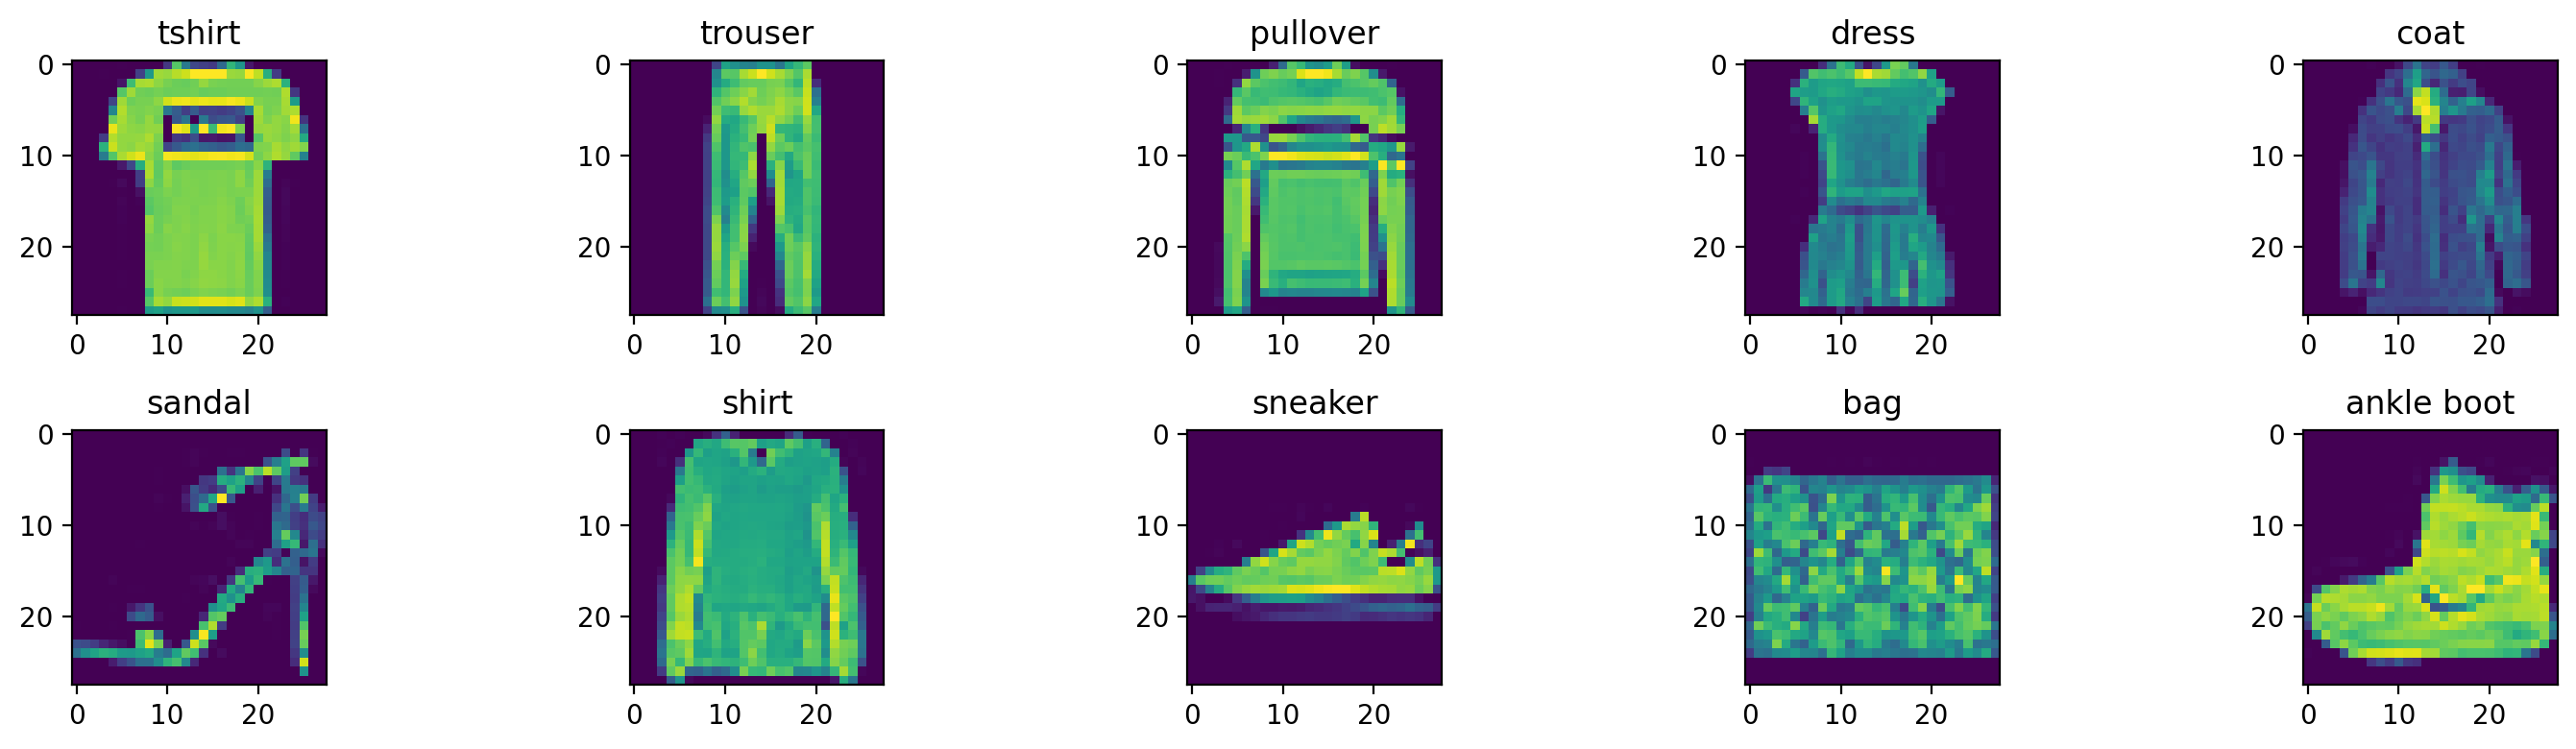

In [56]:
plt.rcParams['figure.figsize'] = (15,4)
plt.rcParams['figure.dpi'] = 200

for i in digits:
  plt.subplot(2,5, i+1)
  plt.imshow(X[y==str(i)].iloc[0].to_numpy().reshape(28,28))
  plt.title(classes[i])

plt.tight_layout()

### Designing a Neural Network

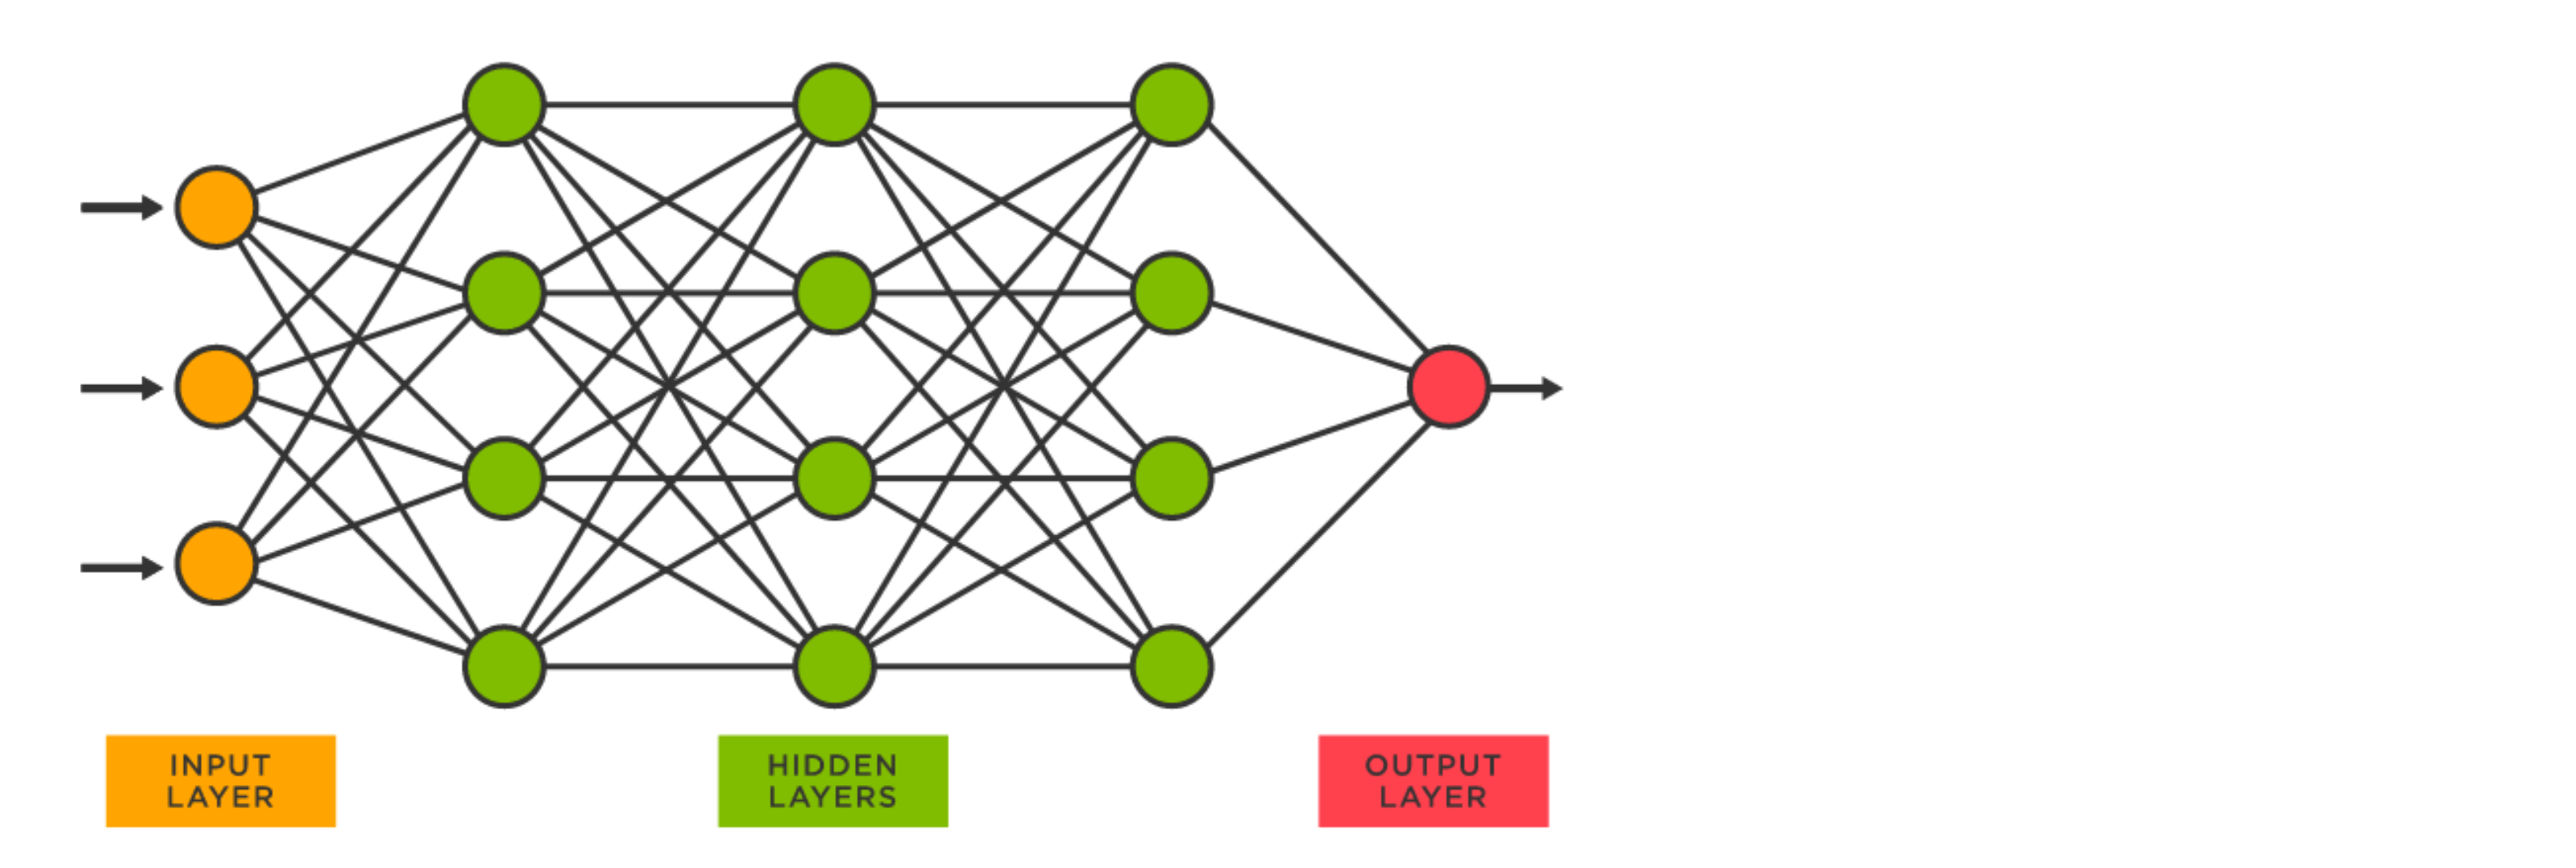

In [57]:
from sklearn.model_selection import train_test_split

In [86]:
y = y.astype('int')
y

0        9
1        0
2        0
3        3
4        0
        ..
69995    9
69996    1
69997    8
69998    1
69999    5
Name: class, Length: 70000, dtype: int64

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X/255, y, test_size=0.2, random_state=42,
                                                    stratify=y)

X_train.shape, X_test.shape

((56000, 784), (14000, 784))

In [60]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [65]:
def get_model():
  model = Sequential()
  model.add(Flatten(input_shape=(X.shape[1],)))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model

In [66]:
model = get_model()

In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


In [70]:
784*64+64, 64*128+128, 128*10+10

(50240, 8320, 1290)

In [71]:
model.layers

In [74]:
model.layers[2].name

'dense_1'

In [78]:
weight1 = model.layers[1].get_weights()

In [82]:
weight1[0].shape, weight1[1].shape

((784, 64), (64,))

In [88]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)
model.evaluate(X_test, y_test)

Epoch 1/10
1750/1750 [==============================] - 5s 2ms/step - loss: 0.5004 - accuracy: 0.8225
Epoch 2/10
1750/1750 [==============================] - 3s 2ms/step - loss: 0.3748 - accuracy: 0.8631
Epoch 3/10
1750/1750 [==============================] - 4s 3ms/step - loss: 0.3412 - accuracy: 0.8746
Epoch 4/10
1750/1750 [==============================] - 5s 3ms/step - loss: 0.3188 - accuracy: 0.8829
Epoch 5/10
1750/1750 [==============================] - 3s 2ms/step - loss: 0.3023 - accuracy: 0.8870
Epoch 6/10
1750/1750 [==============================] - 3s 2ms/step - loss: 0.2882 - accuracy: 0.8930
Epoch 7/10
1750/1750 [==============================] - 4s 2ms/step - loss: 0.2736 - accuracy: 0.8980
Epoch 8/10
1750/1750 [==============================] - 3s 2ms/step - loss: 0.2635 - accuracy: 0.9011
Epoch 9/10
1750/1750 [==============================] - 4s 2ms/step - loss: 0.2552 - accuracy: 0.9035
Epoch 10/10
438/438 [==============================] - 1s 2ms/step - loss: 0.3152 

[0.31518295407295227, 0.8889999985694885]

1/1 [==============================] - 0s 16ms/step


<ipython-input-113-85aec2e2e5f7>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test = X_test[y==i].iloc[0].to_numpy()


1/1 [==============================] - 0s 17ms/step


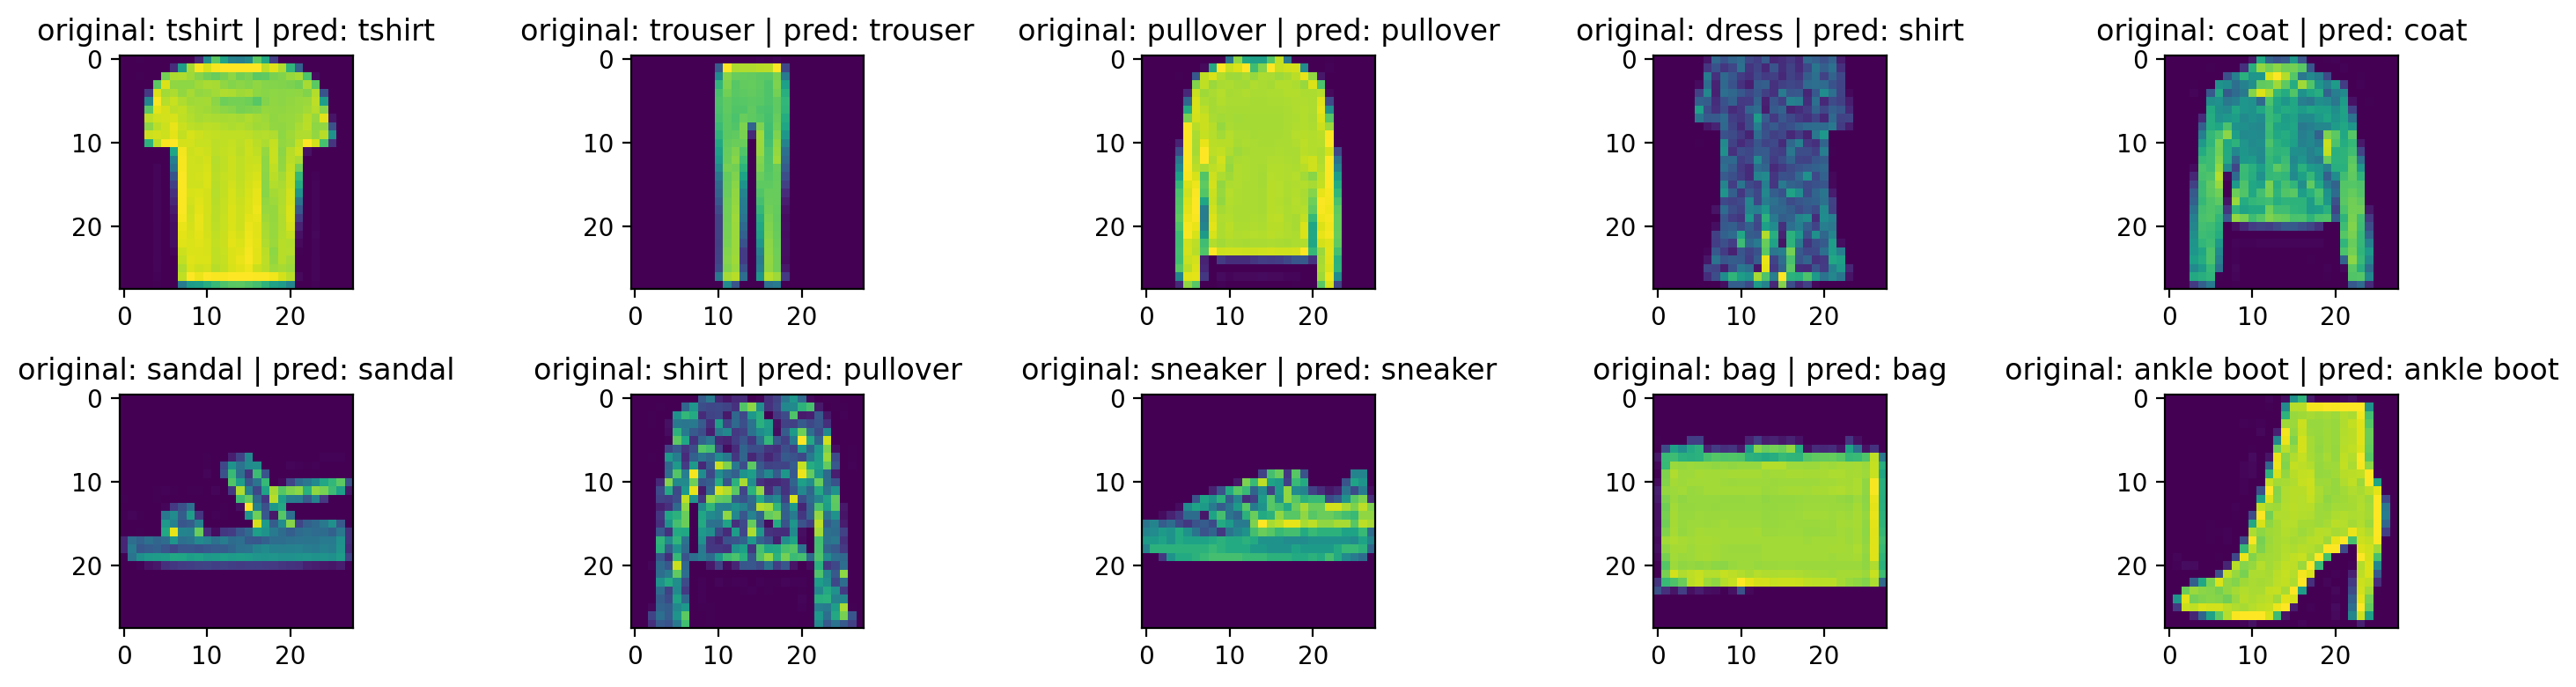

In [113]:
plt.rcParams['figure.figsize'] = (15,4)
plt.rcParams['figure.dpi'] = 200

for i in digits:
  plt.subplot(2,5, i+1)
  test = X_test[y==i].iloc[0].to_numpy()
  plt.imshow(test.reshape(28,28))

  pred = model.predict(test.reshape(1,784,))
  idx = np.argmax(pred[0])
  pred_class = classes[idx]

  plt.title('original: {} | pred: {}'.format(classes[i], pred_class))

plt.tight_layout()

In [111]:
pred = model.predict(test.reshape(1,784,))
idx = np.argmax(pred[0])
pred_class = classes[idx]
pred_class

1/1 [==============================] - 0s 54ms/step


'ankle boot'

In [109]:
pred[0]

array([1.1916370e-13, 6.3737252e-11, 1.2518392e-13, 4.3905482e-14,
       2.6158682e-17, 2.9340492e-07, 1.3044942e-15, 8.5509576e-08,
       7.9099199e-17, 9.9999964e-01], dtype=float32)

## Discovering Overfitting - Early Stopping
- Early stopping is a technique that allows you to stop training a neural network when it stops improving on a validation dataset.
- This is a form of regularization that can be used to prevent overfitting on a training dataset.
- The easiest way to implement early stopping is to use the EarlyStopping callback provided by Keras.